In [ ]:
pip install tensorflow==2.2 #>2.0

     |████████████████████████████████| 516.2 MB 4.6 kB/s 
     |████████████████████████████████| 3.0 MB 25.6 MB/s 
     |████████████████████████████████| 454 kB 44.5 MB/s 
     |████████████████████████████████| 2.9 MB 30.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalli

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
# 2 very important preprocessing is Resizing and Rescaling

In [ ]:
batch_size=16

training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,validation_split=0.1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# dividing the data into training and validation


In [ ]:
train=training_datagenarator.flow_from_directory('/content/drive/MyDrive/Training Data',
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='training')

validation=training_datagenarator.flow_from_directory('/content/drive/MyDrive/Training Data',
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='validation')

Found 12360 images belonging to 3 classes.
Found 1373 images belonging to 3 classes.


In [ ]:
# Initializing CNN
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 256)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0

In [ ]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Training Data/models/fire_and_smoke_model.h5',
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)
callbacks=checkpoint

In [ ]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit_generator(train,validation_data=validation,epochs=1,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks 
                 )

Instructions for updating:
Please use Model.fit, which supports generators.
772/772 [==============================] - 1105s 1s/step - loss: 0.0658 - accuracy: 0.9823 - val_loss: 0.0283 - val_accuracy: 0.9919


In [ ]:
from tensorflow.keras.models import load_model
cnn=load_model('/content/drive/MyDrive/Training Data/models/fire_and_smoke_model.h5')

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 256)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [ ]:
image_for_testing=r'/content/drive/MyDrive/Training Data/Fire/b.jpg'

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


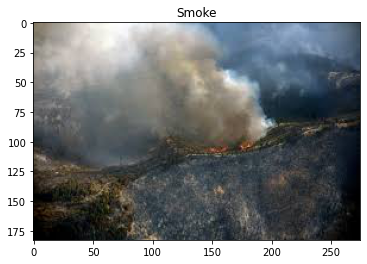

In [ ]:
test_image=image.load_img(image_for_testing,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict_classes(test_image)

Catagories=['Fire','Smoke']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()

# New Section

In [ ]:
image_for_testing=r'/content/drive/MyDrive/Training Data/Fire/14.jpg'

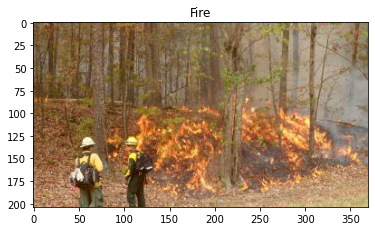

In [ ]:
test_image=image.load_img(image_for_testing,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict_classes(test_image)

Catagories=['Fire','Smoke']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()